#  Data Augmentation for Image Classification Tasks
## Mini-Project for Comp7250 Machine Learning
Author: ZHU Qinghui

Run all cells to regenerate the results.

Feel free to use the outline to skip.

In [7]:
!pip install pipreqs
!pipreqs . --encoding=utf8 --force


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   ---------------------------- ---------- 573.4/798.3 kB 18.2 MB/s eta 0:00:01
   ---------------------------- ---------- 573.4/798.3 kB 18.2 MB/s eta 0:00:01
   ---------------------------------------- 798.3/798.3 kB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/257.4 kB ? eta -:--:--
   ---------------------------------------- 257.4/257.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/48.0 kB ? eta -:--:--
   ---------------------------------------- 48.0/48.0 kB 2.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13775 sha256=a5d5049c41ca96fcd5bc5e576ef839c9f03b1b7726d41111206d2fd37add5525
  Stored in directory: c:\users\felix\appdata\local\pip\cache\wheels\1a\b0\8c\4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully

INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in .\requirements.txt


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential, datasets,models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dropout, DepthwiseConv2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [39]:
#os.environ["CUDA_VISIBLE_DEVICES"]="0"


### Load Cifar-10
https://www.cs.toronto.edu/~kriz/cifar.html

In [40]:
from tensorflow.keras.datasets import cifar10

In [73]:
###Load both training data and test data from cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [74]:
x_train=x_train[:24500]
y_train=y_train[:24500]
# X_train_ = X_train[:24500]
# Y_train = Y_train[:24500]
# X_val = X_val[:10500]
# Y_val = Y_val[:10500]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24500, 32, 32, 3)
(24500, 1)
(10000, 32, 32, 3)
(10000, 1)


In [75]:
### Normalization for features of x
X_train = np.asarray(x_train, dtype=float)/255
X_test = np.asarray(x_test, dtype=float)/255

In [76]:
print(X_train.max())
print(X_test.max())
print(x_train.shape)


1.0
1.0
(24500, 32, 32, 3)


#### Show that Cifar-10 has been properly imported

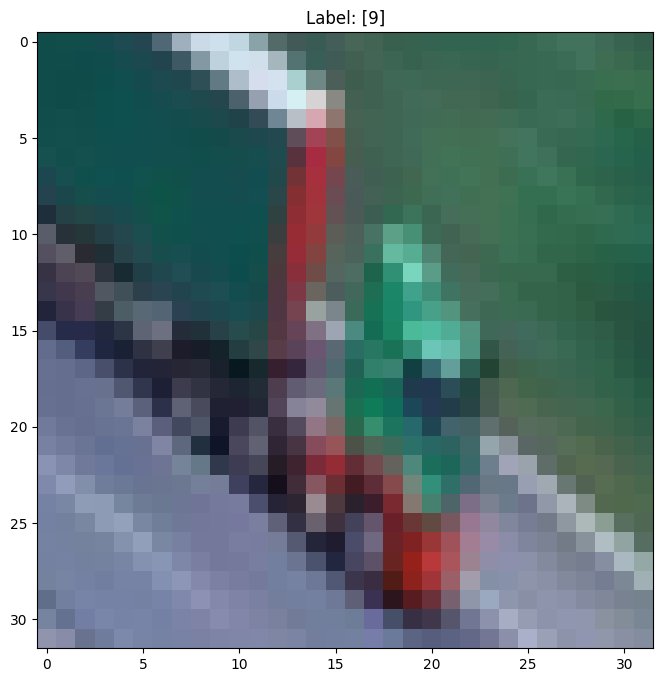

In [45]:
fig = plt.figure(figsize=(8,8))
img = X_train[50]
plt.axis('on')
plt.imshow(img)
plt.title('Label: ' + str(y_train[50]))
plt.show()

e:\Anaconda\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


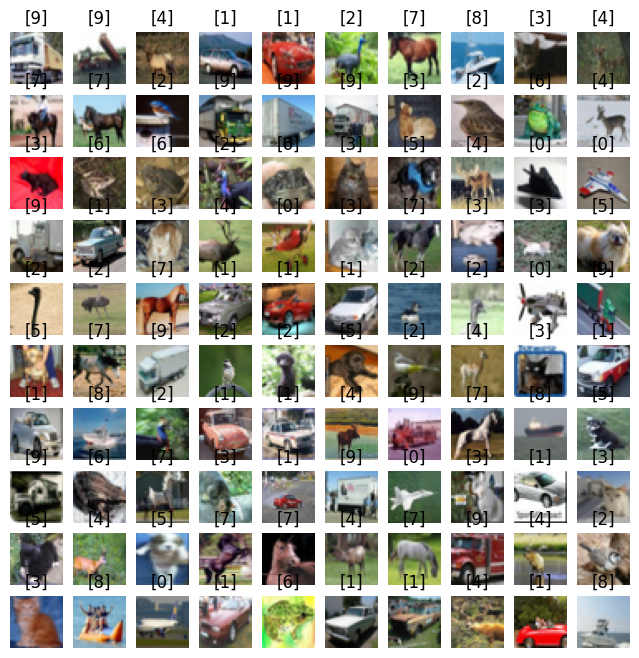

In [77]:
fig = plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(y_train[i])
    plt.imshow(img)
plt.show()

According to the description of Cifar-10, the labels are encoded in to numbers, the corresponding labels are:

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

![屏幕截图 2024-04-12 162416.png](<attachment:屏幕截图 2024-04-12 162416.png>)
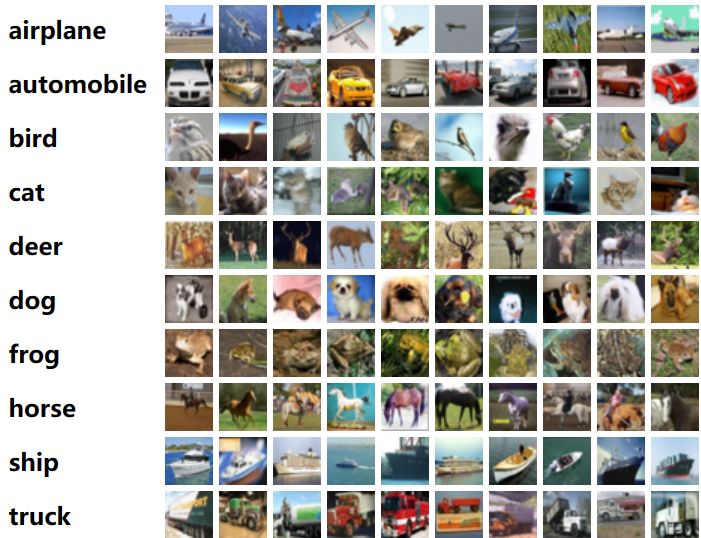

In [47]:
# x_train = x_train/225
# x_test = x_test/255

In [78]:
### Encode label data to one-hot format, with both 10 classes
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test,10)
print(y_cat_train[:5,:])
print(y_cat_test[:5, :])
print(y_train)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[6]
 [9]
 [9]
 ...
 [6]
 [4]
 [7]]


### Build Model - Convolutional Neural Network

In [79]:
from keras.models import Sequential
def create_model():
    model_layers = [
        Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu, depth_multiplier=3),
    #     MaxPooling2D(2, 2),
        Dropout(rate =0.1),
        
        
        Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
    #     MaxPooling2D(2, 2),
        Dropout(rate = 0.1),
        
        Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
    #     MaxPooling2D(2, 2),
        Dropout(rate = 0.4),
        
        Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
        
        
        Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation=keras.activations.relu),
        
        
        
        Conv2D(512, (1, 1), activation='relu', strides=(2, 2), padding='same'),
        BatchNormalization(),
        DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation=keras.activations.relu),
        
    #     MaxPooling2D(2, 2),
        Dropout(rate = 0.4),
        
        Flatten(),
        Dropout(rate = 0.3),
        Dense(2048, activation='relu'),
        Dropout(rate = 0.3),
        Dense(512, activation='relu'),
        Dropout(rate = 0.4),
        Dense(10, activation='softmax')
    ] 
    model = Sequential(model_layers)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# model = Sequential(model_layers)

In [80]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_36 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 depthwise_conv2d_36 (Depth  (None, 32, 32, 96)        960       
 wiseConv2D)                                                     
                                                                 
 dropout_42 (Dropout)        (None, 32, 32, 96)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 64)        55360     
                                                                 
 batch_normalization_37 (Ba  (None, 16, 16, 64)       

In [51]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
### Monitor the validation loss on the validation set, and
### when no decrease takes place in 3 epochs, stop training.

early_stop = EarlyStopping(monitor='val_loss',patience=4)

#### Validation preparasion

In [82]:
X_train_, X_val, Y_train, Y_val = train_test_split(X_train, y_cat_train, random_state=0, test_size=0.3)

print(np.shape(X_train_))
print(np.shape(X_val))
print(np.shape(Y_train))
print(np.shape(Y_val))

(17150, 32, 32, 3)
(7350, 32, 32, 3)
(17150, 10)
(7350, 10)


### MODEL FIT 1: No augmentation

In [84]:
model.fit(X_train_,Y_train,batch_size=64,epochs=20,validation_data=(X_val,Y_val),callbacks=[early_stop])

Epoch 1/20
268/268 [==============================] - 81s 294ms/step - loss: 1.6756 - accuracy: 0.3692 - val_loss: 2.3860 - val_accuracy: 0.1012
Epoch 2/20
268/268 [==============================] - 80s 300ms/step - loss: 1.2557 - accuracy: 0.5455 - val_loss: 1.5223 - val_accuracy: 0.4631
Epoch 3/20
268/268 [==============================] - 81s 301ms/step - loss: 1.0865 - accuracy: 0.6124 - val_loss: 1.2740 - val_accuracy: 0.5660
Epoch 4/20
268/268 [==============================] - 79s 295ms/step - loss: 0.9577 - accuracy: 0.6627 - val_loss: 1.0373 - val_accuracy: 0.6459
Epoch 5/20
268/268 [==============================] - 80s 297ms/step - loss: 0.8716 - accuracy: 0.6899 - val_loss: 0.9543 - val_accuracy: 0.6656
Epoch 6/20
268/268 [==============================] - 83s 310ms/step - loss: 0.7911 - accuracy: 0.7240 - val_loss: 0.8784 - val_accuracy: 0.6989
Epoch 7/20
268/268 [==============================] - 83s 308ms/step - loss: 0.7282 - accuracy: 0.7439 - val_loss: 0.8293 - val_ac

In [85]:
losses = pd.DataFrame(model.history.history)

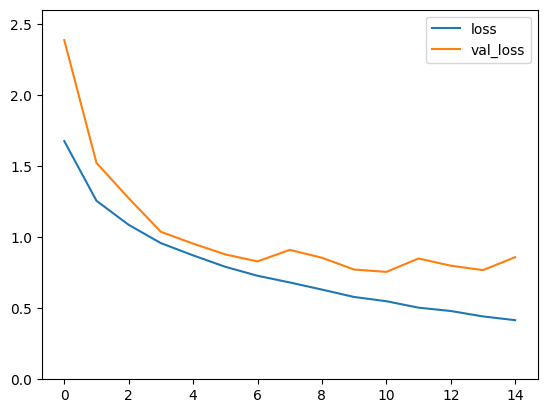

In [115]:
import matplotlib.pyplot as plt
losses[['loss','val_loss']].plot().set_ylim(0,2.6)

plt.show()

(0.0, 0.9)

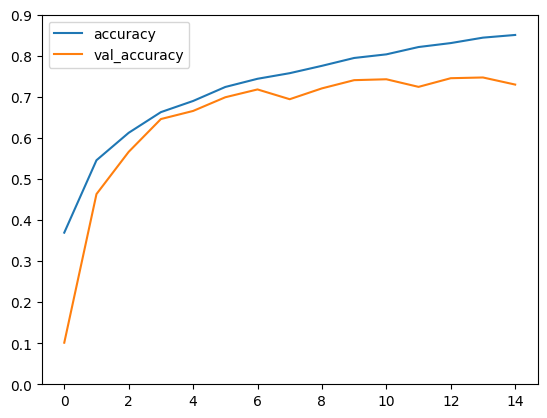

In [120]:
losses[['accuracy','val_accuracy']].plot().set_ylim(0,0.9)

In [110]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.8595167994499207, 0.7315000295639038]


In [89]:
predictions = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 9s 27ms/step


In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1000
           1       0.89      0.79      0.84      1000
           2       0.70      0.56      0.62      1000
           3       0.63      0.49      0.55      1000
           4       0.67      0.69      0.68      1000
           5       0.72      0.58      0.64      1000
           6       0.85      0.77      0.80      1000
           7       0.68      0.84      0.75      1000
           8       0.80      0.85      0.83      1000
           9       0.73      0.91      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [91]:
print('y_train shape: ', np.shape(y_train))
print('y_test shape: ',np.shape(y_test))
print('predictions shape: ', np.shape(predictions))


y_train shape:  (24500, 1)
y_test shape:  (10000, 1)
predictions shape:  (10000,)


In [92]:
confusion_matrix(y_test,predictions)

array([[840,  13,  16,   8,  24,   2,   1,   7,  52,  37],
       [ 28, 794,   1,   1,   3,   2,   1,   0,  15, 155],
       [120,   4, 561,  44,  99,  50,  41,  46,  19,  16],
       [ 58,  12,  57, 487,  70, 119,  52,  73,  36,  36],
       [ 33,   4,  69,  39, 689,  10,  20, 124,   8,   4],
       [ 28,   4,  33, 123,  57, 578,  22, 117,  22,  16],
       [ 21,  17,  25,  43,  59,   8, 766,  10,  33,  18],
       [ 32,   6,  29,  19,  24,  32,   2, 838,   2,  16],
       [ 84,  15,   4,   2,   2,   1,   1,   4, 852,  35],
       [ 28,  26,   3,   4,   4,   0,   0,   5,  20, 910]], dtype=int64)

Elements on the diagonal represent the number of samples that the model correctly classifies.

Row i column j element: represents the number of samples whose true class is class i and the model predicts is class j.

1/1 [==============================] - 0s 22ms/step
True class: deer 
Predicted class: airplane
1/1 [==============================] - 0s 20ms/step
True class: truck 
Predicted class: truck
1/1 [==============================] - 0s 21ms/step
True class: truck 
Predicted class: truck
1/1 [==============================] - 0s 21ms/step
True class: ship 
Predicted class: ship
1/1 [==============================] - 0s 21ms/step
True class: horse 
Predicted class: horse


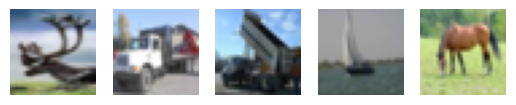

In [108]:
### Play with specific samples:

classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
d = dict(zip(classes, class_names))

# my_image_30 = x_test[30]
# my_image_35 = x_test[35]
# my_image_40 = x_test[40]
# my_image_45 = x_test[45]
# my_image_50 = x_test[50]
i_plot=1
for i in range (40, 61, 5):
    
    plt.subplot(1, 5, i_plot)
    i_plot+=1
    img = X_test[i]
    #fig.add_subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
    input_img = X_test[i].reshape(1,32,32,3)
    predictions = np.argmax(model.predict(input_img), axis=-1)[0]
    print(f"True class: {d[y_test[i][0]]} \nPredicted class: {d[predictions]}")
plt.show()

#plt.imshow(my_image_30)
#input_img = x_test[i].reshape(1,32,32,3)

#predictions = np.argmax(model.predict(input_img), axis=-1)[0]

#print(f"True class: {d[y_test[20][0]]}, Predicted class: {d[predictions]}")

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

### MODEL FIT 2: WITH Augmentation

#### Define augmentation generator

In [94]:
# Data augumetation
datagen = ImageDataGenerator(
        rotation_range=0.3,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True)
datagen_original = ImageDataGenerator()

In [95]:
def generate_combined_batches(X_train_, Y_train, batch_size=64):
    # 每个生成器产生一半的数据量
    half_batch_size = batch_size // 2
    gen_augmented = datagen.flow(X_train_, Y_train, batch_size=half_batch_size)      #Generate augumented data with half the samples
    gen_original = datagen_original.flow(X_train_, Y_train, batch_size=batch_size)   #Generate original data with full the samples
    while True:
        X_batch_augmented, Y_batch_augmented = next(gen_augmented)
        X_batch_original, Y_batch_original = next(gen_original)
        X_batch_combined = np.vstack((X_batch_augmented, X_batch_original))
        Y_batch_combined = np.vstack((Y_batch_augmented, Y_batch_original))
        yield (X_batch_combined, Y_batch_combined)


#### Fit 2.1

In [96]:
#Previous model settings here for comparison:
#model.fit(X_train,Y_train,batch_size=64,epochs=20,
#           validation_data=(X_val,Y_val),callbacks=[early_stop])
model_ = create_model()
#model_.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_.fit(
    generate_combined_batches(X_train_, Y_train, batch_size=64), validation_data=(X_val, Y_val),
      callbacks=[early_stop], epochs=20, steps_per_epoch=len(X_train_) // 64 )
#Unused parameter: >>>steps_per_epoch=len(X_train) // 64

Epoch 1/20
267/267 [==============================] - 109s 400ms/step - loss: 1.6436 - accuracy: 0.3849 - val_loss: 2.3159 - val_accuracy: 0.1012
Epoch 2/20
267/267 [==============================] - 104s 391ms/step - loss: 1.2108 - accuracy: 0.5613 - val_loss: 1.2856 - val_accuracy: 0.5736
Epoch 3/20
267/267 [==============================] - 104s 390ms/step - loss: 1.0273 - accuracy: 0.6378 - val_loss: 1.2188 - val_accuracy: 0.6026
Epoch 4/20
267/267 [==============================] - 105s 395ms/step - loss: 0.9124 - accuracy: 0.6746 - val_loss: 0.9706 - val_accuracy: 0.6616
Epoch 5/20
267/267 [==============================] - 104s 390ms/step - loss: 0.8294 - accuracy: 0.7076 - val_loss: 0.9962 - val_accuracy: 0.6622
Epoch 6/20
267/267 [==============================] - 102s 384ms/step - loss: 0.7627 - accuracy: 0.7318 - val_loss: 1.0083 - val_accuracy: 0.6733
Epoch 7/20
267/267 [==============================] - 105s 395ms/step - loss: 0.7045 - accuracy: 0.7571 - val_loss: 0.8416 -

In [97]:
losses_ = pd.DataFrame(model_.history.history)

(0.0, 2.6)

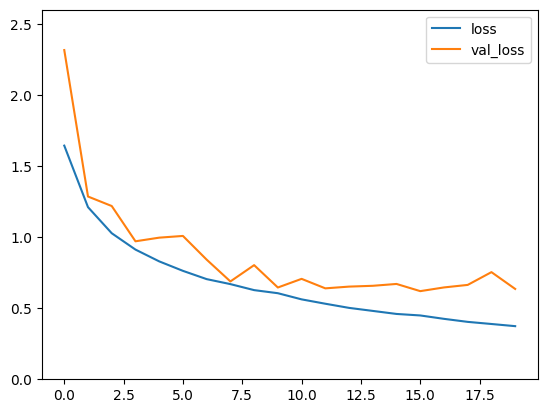

In [117]:
losses_[['loss','val_loss']].plot().set_ylim(0,2.6)

(0.0, 0.9)

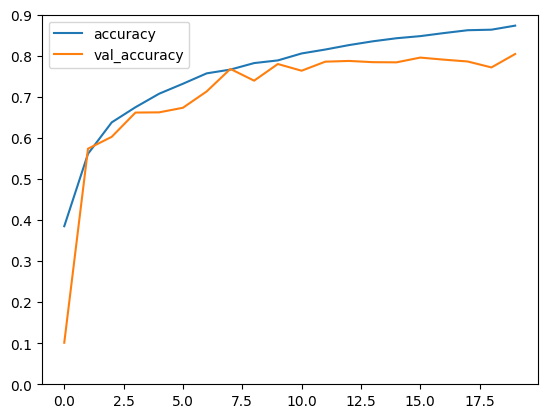

In [119]:
losses_[['accuracy','val_accuracy']].plot().set_ylim(0,0.9)

In [100]:
print(model_.metrics_names)
print(model_.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.6440794467926025, 0.8044999837875366]


In [101]:
predictions = np.argmax(model_.predict(X_test), axis=-1)

313/313 [==============================] - 9s 30ms/step


In [102]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.93      0.90      0.91      1000
           2       0.81      0.63      0.71      1000
           3       0.68      0.57      0.62      1000
           4       0.72      0.85      0.78      1000
           5       0.72      0.76      0.74      1000
           6       0.76      0.91      0.83      1000
           7       0.89      0.82      0.86      1000
           8       0.92      0.85      0.88      1000
           9       0.85      0.92      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



In [103]:
print('y_train shape: ', np.shape(y_train))
print('y_test shape: ',np.shape(y_test))
print('predictions shape: ', np.shape(predictions))


y_train shape:  (24500, 1)
y_test shape:  (10000, 1)
predictions shape:  (10000,)


In [104]:
confusion_matrix(y_test,predictions)

array([[838,   7,  29,  13,  26,   4,  19,   3,  33,  28],
       [  8, 900,   0,   5,   2,   3,  12,   0,  10,  60],
       [ 60,   2, 628,  43,  97,  54,  86,  19,   6,   5],
       [ 14,   2,  31, 572,  77, 163,  92,  23,  11,  15],
       [  6,   2,  29,  22, 853,  19,  42,  23,   2,   2],
       [  3,   1,  17, 113,  48, 756,  25,  27,   4,   6],
       [  3,   1,  22,  27,  19,  14, 911,   2,   1,   0],
       [  9,   1,  14,  35,  58,  37,   9, 822,   3,  12],
       [ 74,  16,   7,   7,   7,   2,   8,   2, 848,  29],
       [ 21,  38,   3,   9,   4,   0,   2,   1,   5, 917]], dtype=int64)

Elements on the diagonal represent the number of samples that the model correctly classifies.

Row i column j element: represents the number of samples whose true class is class i and the model predicts is class j.

1/1 [==============================] - 0s 23ms/step
True class: deer 
Predicted class: deer
1/1 [==============================] - 0s 23ms/step
True class: truck 
Predicted class: truck
1/1 [==============================] - 0s 24ms/step
True class: truck 
Predicted class: truck
1/1 [==============================] - 0s 21ms/step
True class: ship 
Predicted class: ship
1/1 [==============================] - 0s 20ms/step
True class: horse 
Predicted class: horse


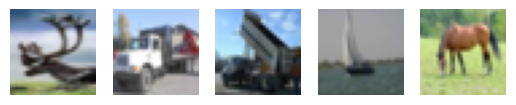

In [109]:
### Play with specific samples:

classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
d = dict(zip(classes, class_names))

# my_image_30 = x_test[30]
# my_image_35 = x_test[35]
# my_image_40 = x_test[40]
# my_image_45 = x_test[45]
# my_image_50 = x_test[50]
i_plot=1
for i in range (40, 61, 5):
    
    plt.subplot(1, 5, i_plot)
    i_plot+=1
    img = X_test[i]
    #fig.add_subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
    input_img = X_test[i].reshape(1,32,32,3)
    predictions = np.argmax(model_.predict(input_img), axis=-1)[0]
    print(f"True class: {d[y_test[i][0]]} \nPredicted class: {d[predictions]}")
plt.show()

#plt.imshow(my_image_30)
#input_img = x_test[i].reshape(1,32,32,3)

#predictions = np.argmax(model.predict(input_img), axis=-1)[0]

#print(f"True class: {d[y_test[20][0]]}, Predicted class: {d[predictions]}")

CNN WITH NO AUGMENTATION, 20% TRAINING SET FOR VALIDATION

In [ ]:
# X_train_80, X_val, Y_train, Y_val = train_test_split(X_train, y_cat_train, random_state=0, test_size=0.3)
# print(np.shape(X_train_80))
# print(np.shape(X_val))
# print(np.shape(Y_train))
# print(np.shape(Y_val))

#### Fit 2.2 (Try again with no augmentation)

In [ ]:
model__ = create_model()
model__.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model__.fit(X_train_,Y_train,batch_size=64,epochs=20,validation_data=(X_val,Y_val),callbacks=[early_stop])

In [ ]:
losses = pd.DataFrame(model__.history.history)

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
print(model__.metrics_names)
print(model__.evaluate(X_test,y_cat_test,verbose=0))

In [ ]:
predictions = np.argmax(model__.predict(X_test), axis=-1)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print('y_train shape: ', np.shape(y_train))
print('y_test shape: ',np.shape(y_test))
print('predictions shape: ', np.shape(predictions))


In [ ]:
confusion_matrix(y_test,predictions)

Elements on the diagonal represent the number of samples that the model correctly classifies.

Row i column j element: represents the number of samples whose true class is class i and the model predicts is class j.

In [ ]:
### Play with specific samples:

classes = [0,1,2,3,4,5,6,7,8,9]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
d = dict(zip(classes, class_names))

# my_image_30 = x_test[30]
# my_image_35 = x_test[35]
# my_image_40 = x_test[40]
# my_image_45 = x_test[45]
# my_image_50 = x_test[50]
i_plot=1
for i in range (50, 71, 5):
    
    plt.subplot(1, 5, i_plot)
    i_plot+=1
    img = X_test[i]
    #fig.add_subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
    input_img = X_test[i].reshape(1,32,32,3)
    predictions = np.argmax(model__.predict(input_img), axis=-1)[0]
    print(f"True class: {d[y_test[i][0]]} \nPredicted class: {d[predictions]}")
plt.show()

#plt.imshow(my_image_30)
#input_img = x_test[i].reshape(1,32,32,3)

#predictions = np.argmax(model.predict(input_img), axis=-1)[0]

#print(f"True class: {d[y_test[20][0]]}, Predicted class: {d[predictions]}")